<a href="https://colab.research.google.com/github/JhonFiUNFV/python_prep/blob/master/02_iris_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/tensorflow.git

Cloning into 'tensorflow'...
remote: Enumerating objects: 60398, done.
remote: Total 60398 (delta 0), reused 0 (delta 0), pack-reused 60398
Receiving objects: 100% (60398/60398), 443.85 MiB | 24.56 MiB/s, done.
Resolving deltas: 100% (131/131), done.
Checking out files: 100% (60276/60276), done.


# Damos acceso a nuestro Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Test it

In [3]:
!ls '/content/drive/My Drive' 

'2. Intermedio'
 Canva
'CFA - LEVEL II - TANDEM FINANCE'
 Classroom
'Colab Notebooks'
 constancia_empleo3.pdf
 Curso_Proyectos_InviertePE
 Data
'Data (1).xlsx'
 Data.gsheet
 Data.xlsx
 GRUPOS_PY.gsheet
'informe5 (1).gsheet'
 informe5.gsheet
'Investigación UX - JHON VIDAL FIGUEROA CÉSPEDES.gsheet'
'JHON VIDAL FIGUEROA CÉSPEDES.pdf'
 LeWagon
 Master.xlsx
 ModuloII_FundamentosdeMachineLearning
 ModuloIV_ManejodeBasedeDatos
 ProgramadeEspecializacionenDataScience
 PROYECTO_CONSTRUCCION.docx
'PROYECTO GRUPO 01.pptx'
 python-ml
'QUANT 2021'
 rar
'SEMINARIO DE ADM DE RIESGO EN BANCA'
'Sesión 2-20220320T150758Z-001.zip'
 tensorflow
'Teoria Económica y Finanzas'
'TESIS JHON FIGUEROA'
 Worksheet.xlsx


# Google colab tools

In [4]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

##Especificando la versión de TensorFlow

Ejecutando "importar tensorflow" importará la versión por defecto (actualmente 2.x). Puedes usar la 1.x ejecutando una celda con la "versión mágica de tensorflow" **antes de ejecutar "importar tensorflow".

### Si no funciona hacer el pip install


In [5]:
#!pip install tensorflow==1.14
%tensorflow_version 1.x

TensorFlow 1.x selected.


# Importar Tensorflow

In [6]:
import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt

1.15.2


In [7]:
session = tf.Session()

# Predicción de la longitud del sépalo en función de la anchura del pétalo 

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

In [9]:
iris = datasets.load_iris()

In [10]:
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([x[0] for x in iris.data])

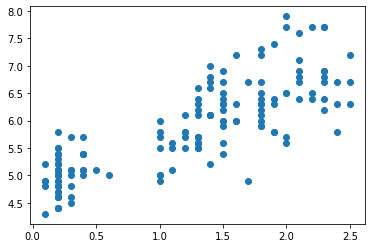

In [11]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")

In [12]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

$$y = Ax+b$$

In [13]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [14]:
loss_l2 = tf.reduce_mean(tf.square(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l2)
init = tf.global_variables_initializer()
session.run(init)

In [15]:
loss_vect_l2 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l2, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l2.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[2.6413567]], b=[[1.9635711]], Loss = 3.193585
Paso #20, A=[[2.394074]], b=[[2.5048738]], Loss = 1.787186
Paso #30, A=[[2.1344104]], b=[[2.9941478]], Loss = 1.4137013
Paso #40, A=[[1.8486663]], b=[[3.2916203]], Loss = 0.7756731
Paso #50, A=[[1.7213215]], b=[[3.5701632]], Loss = 0.7455941
Paso #60, A=[[1.5339679]], b=[[3.744278]], Loss = 0.43505052
Paso #70, A=[[1.405172]], b=[[3.9519033]], Loss = 0.39858234
Paso #80, A=[[1.3295344]], b=[[4.128238]], Loss = 0.21660064
Paso #90, A=[[1.2405101]], b=[[4.2659016]], Loss = 0.23770007
Paso #100, A=[[1.1508253]], b=[[4.355208]], Loss = 0.3662684


In [16]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [17]:
print(str(slope)+"x+"+str(intercept))

1.1508253x+4.355208


In [18]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

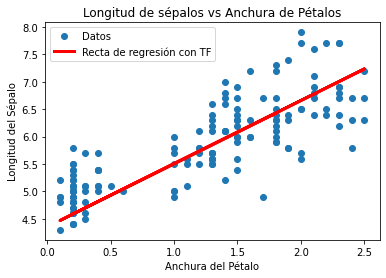

In [20]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

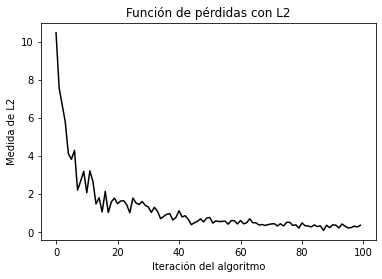

In [21]:
plt.plot(loss_vect_l2, "k-")
plt.title("Función de pérdidas con L2")
plt.xlabel("Iteración del algoritmo")
plt.ylabel("Medida de L2")
plt.show()

In [22]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
session = tf.Session()

In [23]:
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [24]:
y_predict = tf.add(tf.matmul(x_data, A), b)

In [25]:
loss_l1 = tf.reduce_mean(tf.abs(y_target-y_predict))
my_optim = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = my_optim.minimize(loss_l1)
init = tf.global_variables_initializer()
session.run(init)

In [32]:
loss_vect_l1 = []
for i in range(100):
    rand_idx = np.random.choice(len(x_vals), size = batch_size)
    rand_x = np.transpose([x_vals[rand_idx]])
    rand_y = np.transpose([y_vals[rand_idx]])

    session.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = session.run(loss_l1, feed_dict={x_data:rand_x, y_target: rand_y})
    loss_vect_l1.append(temp_loss)
    if(i+1)%10==0:
        print("Paso #"+str(i+1)+", A="+str(session.run(A))+", b="+str(session.run(b))+
             ", Loss = "+str(temp_loss))

Paso #10, A=[[0.87430316]], b=[[4.819737]], Loss = 0.30755353
Paso #20, A=[[0.8547031]], b=[[4.7997365]], Loss = 0.49460107
Paso #30, A=[[0.8753031]], b=[[4.8077354]], Loss = 0.36790353
Paso #40, A=[[0.8693031]], b=[[4.7797356]], Loss = 0.42619666
Paso #50, A=[[0.85570306]], b=[[4.763736]], Loss = 0.4633055
Paso #60, A=[[0.9153031]], b=[[4.815736]], Loss = 0.32529163
Paso #70, A=[[0.82530314]], b=[[4.7557364]], Loss = 0.3582975
Paso #80, A=[[0.85210323]], b=[[4.755737]], Loss = 0.33614537
Paso #90, A=[[0.84510314]], b=[[4.779737]], Loss = 0.3706147
Paso #100, A=[[0.8561032]], b=[[4.7757373]], Loss = 0.34890023


In [33]:
[[slope]] = session.run(A)
[[intercept]] = session.run(b)

In [34]:
print(str(slope)+"x+"+str(intercept))

0.8561032x+4.7757373


In [35]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+intercept)

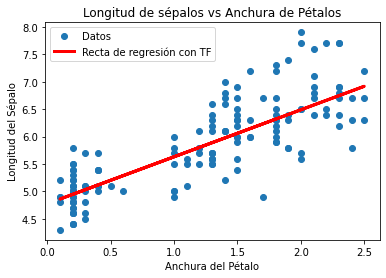

In [36]:
plt.plot(x_vals, y_vals, 'o', label = "Datos")
plt.plot(x_vals, best_fit, 'r-', label="Recta de regresión con TF", linewidth=3)
plt.legend(loc = "upper left")
plt.title("Longitud de sépalos vs Anchura de Pétalos")
plt.xlabel("Anchura del Pétalo")
plt.ylabel("Longitud del Sépalo")
plt.show()

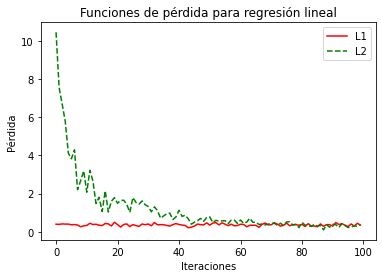

In [37]:
plt.plot(loss_vect_l1, 'r-', label = "L1")
plt.plot(loss_vect_l2, 'g--', label = "L2")
plt.title("Funciones de pérdida para regresión lineal")
plt.xlabel("Iteraciones")
plt.ylabel("Pérdida")
plt.legend(loc = "upper right")
plt.show()

In [38]:
slope*np.mean(x_vals)+intercept

5.802490368366241

In [39]:
intercept

4.7757373

In [40]:
np.mean(y_vals)

5.843333333333334